In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
#Create data to be used (samples will be multipleoed by 2)
def create_samples(samples):
    green_people = np.random.randint(0,100, size= (samples,2)).tolist()
    red_people = np.random.randint(50,150, size= (samples,2)).tolist()
    
    #Tell to the program that 0: green_people and 1: red_people
    colour = np.concatenate((np.zeros(samples), np.ones(samples))).flatten().tolist()
    
    return {'green people':green_people, 'red people':red_people, 'colour': colour}

print(create_samples(10))
    

{'green people': [[70, 33], [46, 9], [3, 77], [85, 89], [31, 23], [20, 99], [75, 94], [28, 66], [44, 92], [46, 13]], 'red people': [[89, 83], [113, 67], [121, 54], [144, 52], [134, 140], [94, 104], [80, 103], [70, 97], [83, 104], [144, 149]], 'colour': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


SVC score:  0.875
KNN score:  0.8
SCV: 1 Red
KNN: 0 Green


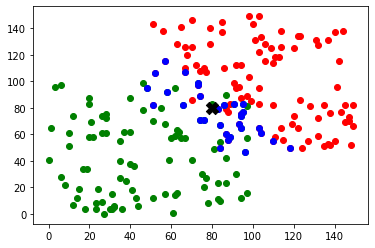

In [24]:
#SVM function
def determine_colour(a,b):
    #Prepare data
    data = create_samples(100)
    green_people, red_people = data['green people'], data['red people'] 
    
    people = green_people + red_people
    colour = data['colour']
    
    #Get data
    X = np.array(people).tolist()
    y = np.array(colour).tolist()
    
    #Split data to train and test
    X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)
    
    #Create Supert Vector Machine & KNN classifier (models)
    clf = SVC(kernel='linear', C=5)
    knn = KNeighborsClassifier(n_neighbors=15)
    
    #Fit the data
    clf.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    
    #Print the score of the model
    print('SVC score: ', clf.score(X_test, y_test))
    print('KNN score: ', knn.score(X_test, y_test))
    
    #Predict the output to data input
    prediction_clf = clf.predict([[a,b]])
    prediction_knn = knn.predict([[a,b]])
    
    #convert to int
    clf_value, knn_value = int(prediction_clf[0]) , int(prediction_knn[0])
    
    #Print the prediction for both algoritms
    print(f'SCV: {clf_value}', 'Red' if clf_value == 1 else 'Green')
    print(f'KNN: {knn_value}', 'Red' if knn_value == 1 else 'Green')
    
    #Colour the plots and scatter them
    red_scatter = [np.array(red_people)[:,0], np.array(red_people)[:,1]]
    green_scatter = [np.array(green_people)[:, 0], np.array(green_people)[:, 1]]
                     
    plt.scatter(red_scatter[0],red_scatter[1], c='r')
    plt.scatter(green_scatter[0],green_scatter[1], c='g')     
    
    #Get the support vectors
    support_vectors = clf.support_vectors_
    plt.scatter(support_vectors[:,0],support_vectors[:,1], c='b', marker='o')
    
    #Plot data input [a,b]
    plt.scatter(a,b, color='black', s=150, marker='X')
    
determine_colour(80,80)
    